### Assignment: Bike Sharing Multiple Linear Regression.
##### Neeraj Dhiman, Date - 30/10/2024
#### Goal: 
##### For Bike sharing problem, need to build model to understand the relationship between bike rental sales and different independent variables.
##### The Model will be used to understand the demand against the different variables.

#### Steps:
1. [importing Required Libraries](#lib)
2. [Importing and understanding Data](#read)
3. [Cleaning/segregating Data](#cln-3)
   <br>3.1 [Check Missing Values](#cln-3-1)<br>
   3.2 [Check Unique Values](#cln-3-2)<br>
   3.3 [Remove Insignificant Columns](#cln-3-3)<br>
   3.4 [Identify Numeric and Categorical variables](#cln-3-4)<br>
   3.5 [Outliers](#cln-3-5)
4. [Exploratory Data Analysis](#eda)<br>
    4.1 [Univariate Analysis](#uni)<br>
    4.2 [Bivariate Analysis](#bi)<br>
    4.3 [Multivariate Analysis](#multi)
5. [Preprocessing](#prep)
   <br>5.1 Get Dummies
   <br>5.2 Train-Test Split
   <br>5.3 Scaling Algorithm Hypothesis
   <br>5.4 Scaling (MinMaxScaler())
   <br>5.5 RFE (Recursive Feature elimination)
6. [Modelling](#model)
7. [Model Evaluation](#evaluate)
8. [Predictions](#pred)
    

<a id='lib'></a>
#### 1. Importing Required Libraries


In [138]:
#Import Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#model libraries train-test split
from sklearn.model_selection import train_test_split
# Scaler import MinMax
from sklearn.preprocessing import MinMaxScaler
# feature selection and linear regression apis
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#modelling apis statsmodels.api
import statsmodels.api as sm
#vif - variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
plt.style.use("classic")
sns.set_palette("deep")

##### - Data Frame dimentions change to accomodate large amount of data

In [3]:
pd.set_option('Display.max_rows', 500)
pd.set_option('Display.max_columns', 500)
pd.set_option('Display.width', 1000)


<a id='read'></a>
#### 2. Importing and Understanding Data

In [4]:
bikes_df=pd.read_csv("day.csv")

In [5]:
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bikes_df.rename(columns={"yr":"year","mnth":"month","hum":"humidity"}, inplace=True)

In [7]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bikes_df.shape

(730, 16)

##### - <i>* Observation
1. Data set has 730 rows and 16 columns i.e. 730 days of data (2 years) against 16 features/parameters.
2. "cnt" is the target/dependent variable, which the model needs to be built on to predict the features affecting the sales.

In [9]:
bikes_df.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
bikes_df_copy=bikes_df.copy()
bikes_df_copy.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<a id='cln-3-1'></a>
#### 3. Cleaning Data
#####   3.1 Check Missing Values

In [11]:
round(100*bikes_df.isna().mean(),2)

instant       0.0
dteday        0.0
season        0.0
year          0.0
month         0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

##### - <i>*There are no missing values to be imputed.

##### 3.2 Check Unique/Duplicate Values
- Get a view of the categorical features

In [12]:
bikes_df[bikes_df.duplicated()]

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt


##### - <i>* no duplicate records found

In [13]:
bikes_df.nunique()

instant       730
dteday        730
season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

##### -<i>* Since we need categorical fields so lets keep the columns for further analysis 

##### 3.3 Removing Insignificant Columns
    - Columns dteday can be dropped as we already have the date related features such as mnth, year and weekday.
    - instant is just an row identifier, so can be ridden off.
    - we shall be using cnt as our target variable, hence removing casual and registered features as these will just create the data 
      redundancy.

In [14]:
#Dropping insignificant/redundant fields/features
bikes_df.drop(["instant","casual","registered","dteday"],axis=1,inplace=True)

In [15]:
#verify Changes
bikes_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### 3.4 Identify Numeric and Categorical Data

###### Identifying categorical features using value_counts() and nunique()

In [16]:
bikes_df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

##### - from above its clear season, yr, mnth, holiday, weekday, wokingday, weathersit are categorical variables, lets check further below

In [17]:
print("category view : Season -->",bikes_df.season.value_counts())
print("category view : Year -->",bikes_df.year.value_counts())
print("category view : Month -->",bikes_df.month.value_counts())
print("category view : Holiday -->",bikes_df.holiday.value_counts())
print("category view : Weekday -->",bikes_df.weekday.value_counts())
print("category view : WorkingDay -->",bikes_df.workingday.value_counts())
print("category view : Weather Situation -->",bikes_df.weathersit.value_counts())

category view : Season --> season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
category view : Year --> year
0    365
1    365
Name: count, dtype: int64
category view : Month --> month
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64
category view : Holiday --> holiday
0    709
1     21
Name: count, dtype: int64
category view : Weekday --> weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
category view : WorkingDay --> workingday
1    499
0    231
Name: count, dtype: int64
category view : Weather Situation --> weathersit
1    463
2    246
3     21
Name: count, dtype: int64


In [18]:
var_target=["cnt"] #cnt is the target variable as identified earlier
feature_num=["temp","atemp","humidity","windspeed","cnt"]
feature_num_analysis=["temp","atemp","humidity","windspeed"]
feature_cat=["season","year","month","holiday","weekday","workingday","weathersit","cnt"]
feature_cat_analysis=["season","month","holiday","weekday","workingday","weathersit"]

<Figure size 1200x1200 with 0 Axes>

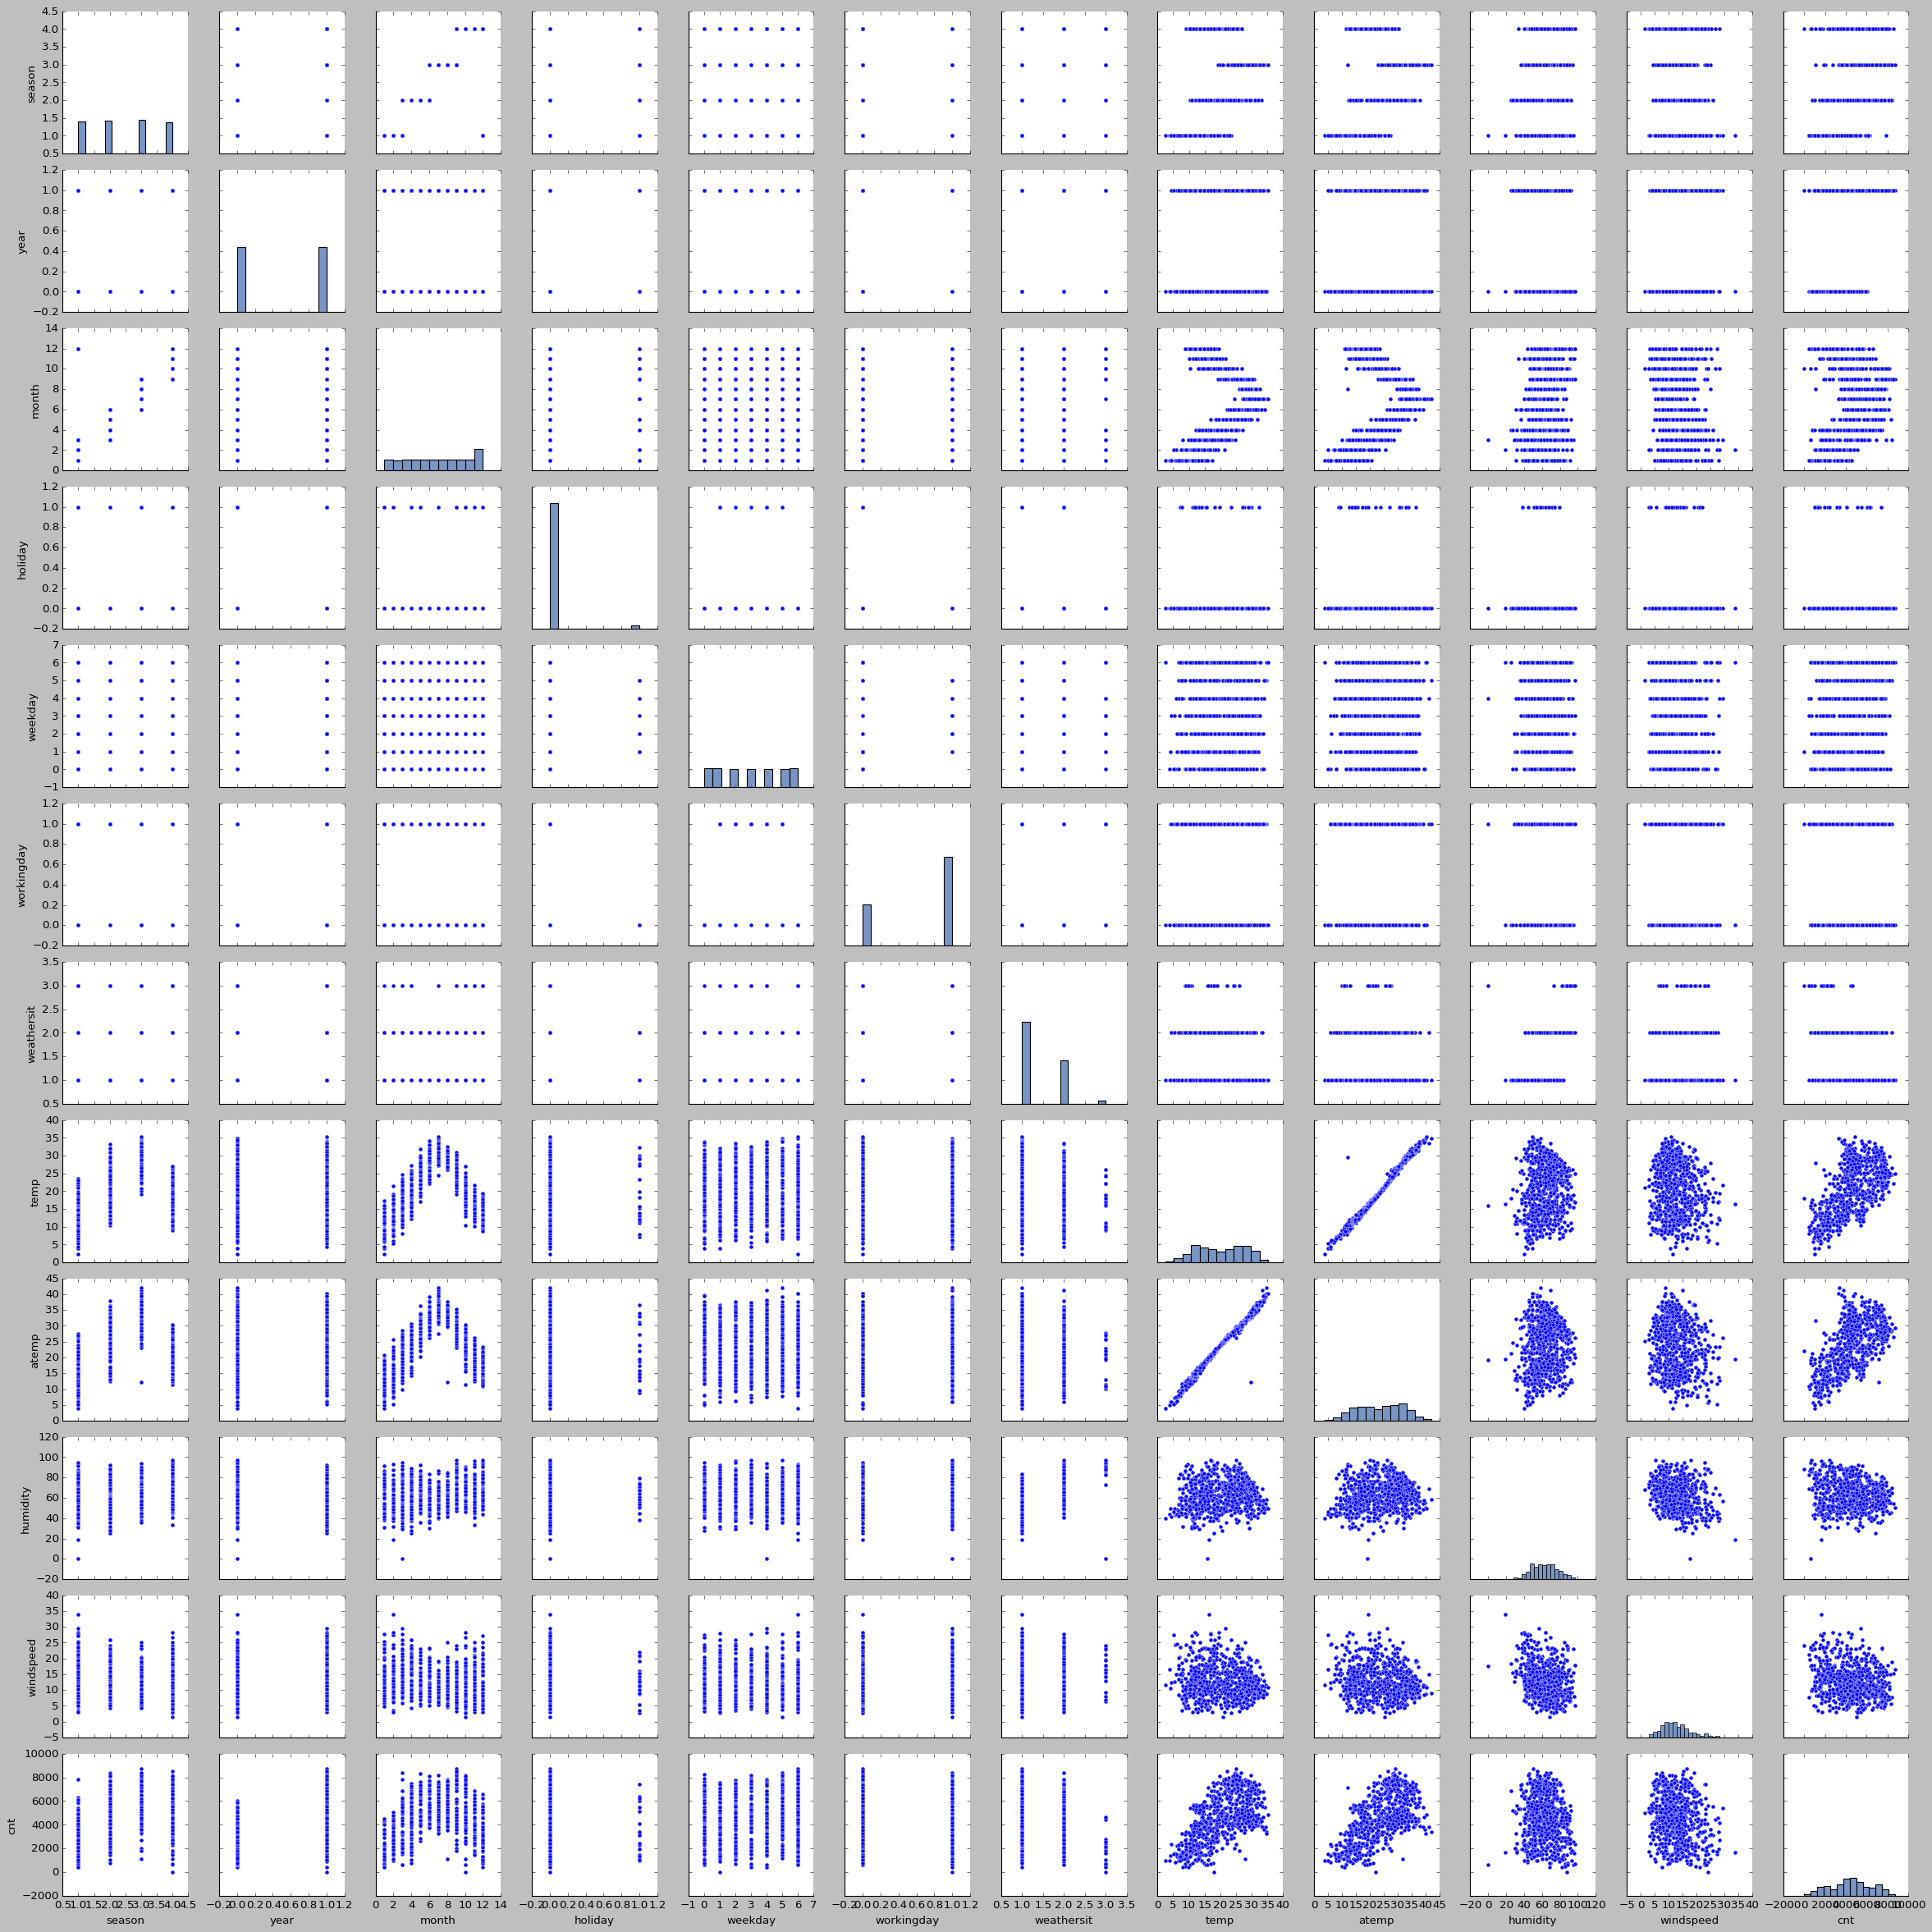

In [19]:
#pairplotting to see the type of the features and the correlation
plt.figure(figsize=(15,15))
sns.pairplot(bikes_df)
plt.show()

##### - <i>* Observation
1. Its evident from pairplot above and the value_counts() method as well that the feature_cat has the categotical features(Since, it is not   continuous). 
2. temp and atemp are highly related to cnt and are highly correlated to each another as well.

##### 3.5 Outliers Analysis

In [20]:
#defined function to plot univariate bivariate plots
def plot_uni_bi(row,col,plt_type,df,size_x=3,size_y=3):
    count=0
    fig, axes = plt.subplots(row,col,figsize=(size_x,size_y))
    if(plt_type=='uni'):#univariate for categorical/dimensional features
            #print(df.name)
            sns.histplot(data=pd.DataFrame(df),x=df.name,kde=True,ax=axes[0])
            sns.boxplot(ax=axes[1],data=pd.DataFrame(df),x=df.name)
            axes[0].set_title(df.name, loc='center')
            plt.tight_layout()
            plt.show()
            print("==================","\n",df.name.upper(),"\n=================="
                  ,pd.DataFrame(df).describe(),"\n\n")
    for i in range(row):           
        for j in range(col):
            if(plt_type=='boxplot_y'):
                sns.boxplot(ax=axes[i,j],data=df,y=df.iloc[:,count].name)
            if(plt_type=='boxplot_x'):
                sns.boxplot(ax=axes[i,j],data=df,x=df.iloc[:,count].name)
            if(plt_type=='boxplot_bi'):
                d=map_cat(df,name=df.iloc[:,count].name)                
                b=sns.boxplot(ax=axes[i,j],data=d,y="cnt",x=d.iloc[:,count].name)
                box_annot(d,d.iloc[:,count].name,"cnt",b)
                axes[i][j].set_title(df.iloc[:,count].name+" Vs cnt", loc='center')
            if(plt_type=='barplot'):
                d=map_cat(df,name=df.iloc[:,count].name)
                sns.barplot(ax=axes[i,j],data=d,y="cnt",x=d.iloc[:,count].name)
                axes[i][j].set_title(d.iloc[:,count].name+" Vs cnt", loc='center')
                
            if(plt_type=='countplot'):
                sns.countplot(ax=axes[i,j],data=df,x=df.iloc[:,count].name)
            if(plt_type=='regplot'):
                sns.regplot(ax=axes[i,j],data=df,x=df.iloc[:,count].name,y="cnt",scatter_kws={"color": "blue"}, line_kws={"color": "red"})
                axes[i][j].set_title(df.iloc[:,count].name+" Vs cnt", loc='center')
            if(plt_type=="hist"):
                sns.histplot(ax=axes[i,j],data=df,x=df.iloc[:,count].name)            
            count+=1
    plt.tight_layout()
    plt.show()

In [21]:
def box_annot(df,xcol,ycol,box_plot):
    medians = df.groupby([xcol])[ycol].median()
    vertical_offset = df[ycol].median() * 0.05 # offset from median for display
    ax=box_plot.axes
    lines = ax.get_lines()
    for xtick in box_plot.get_xticks():
        y = round(lines[4+xtick*6].get_ydata()[0],2)
        ax.text(
        xtick, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white')

In [22]:
def map_cat(df,name=None):
    mapp={"season":{1:"spring",2:"summer",3:"fall",4:"winter"},
          "month":{1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"},
          "weekday":{0:"sun",1:"mon",2:"tue",3:"wed",4:"thur",5:"fri",6:"sat"},
          "weathersit":{1:"clear",2:"cloudy",3:"lightsnow",4:"heavysnow"}
          }
    if(name!=None):
        n="".join(name)
        if(mapp.get(n)!=None):
            df[n]=df[n].map(mapp.get(n))
    else:
        for i in df.columns.tolist():
            if(mapp.get(i)!=None):
                 #print(df[i].map(mapp.get(i)))
                 df[i]=df[i].map(mapp.get(i))
    #print(df)
    return df

In [23]:
def annotate1(x1,y1,s,d,ax):
    for xy in zip(x1, y1):
        ax.annotate(text = ("{}"+s).format(round(xy[1]*d)), xy = xy,  textcoords='data', xycoords='data')

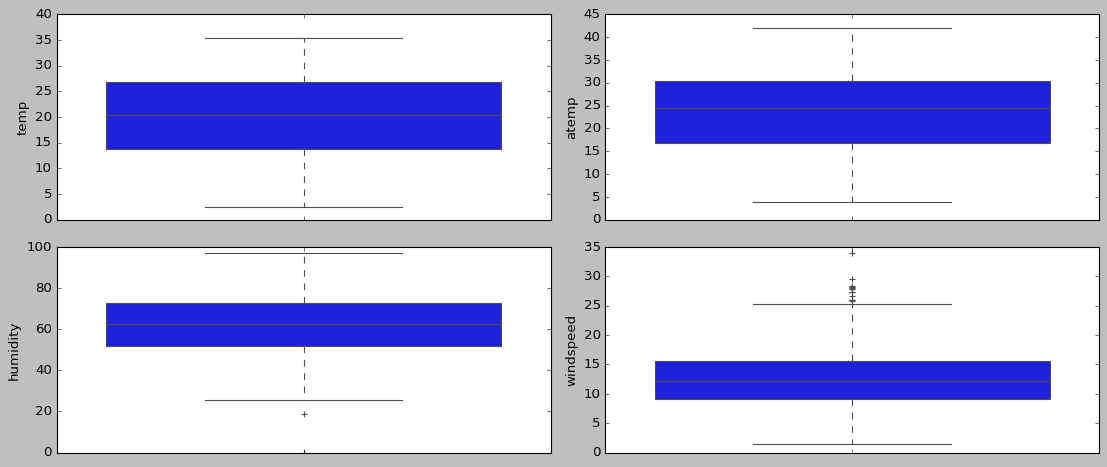

In [24]:
#plot box plots to see the outliers placement in the graph
plot_uni_bi(2,2,"boxplot_y",bikes_df[feature_num],14,6)

##### - <i>* Observation
1. As far as the significant features are concerned there are no outliers as such, we can ignore windspeed.

#### 4. Exploratory Data Analysis
##### 4.1 Univariate Analysis
- Numeric/fact Features
- Categorical/Dimensional Features

##### 4.1.1 Univariate Analysis
##### - Numeric Features

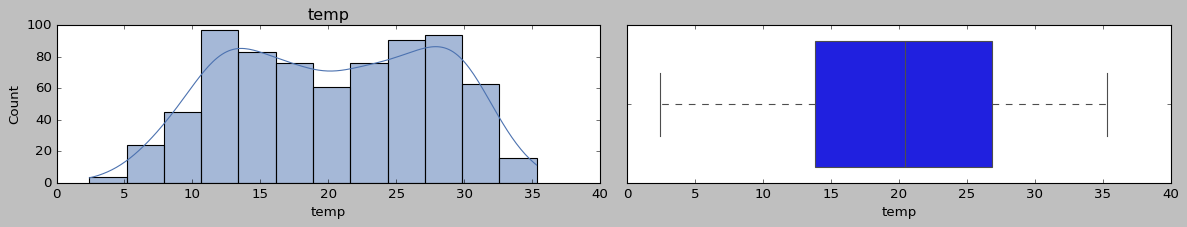

 TEMP 
==================              temp
count  730.000000
mean    20.319259
std      7.506729
min      2.424346
25%     13.811885
50%     20.465826
75%     26.880615
max     35.328347 




<Figure size 640x480 with 0 Axes>

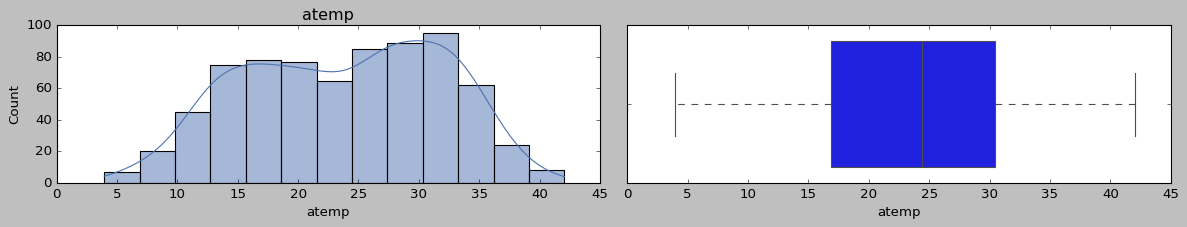

 ATEMP 
==================             atemp
count  730.000000
mean    23.726322
std      8.150308
min      3.953480
25%     16.889713
50%     24.368225
75%     30.445775
max     42.044800 




<Figure size 640x480 with 0 Axes>

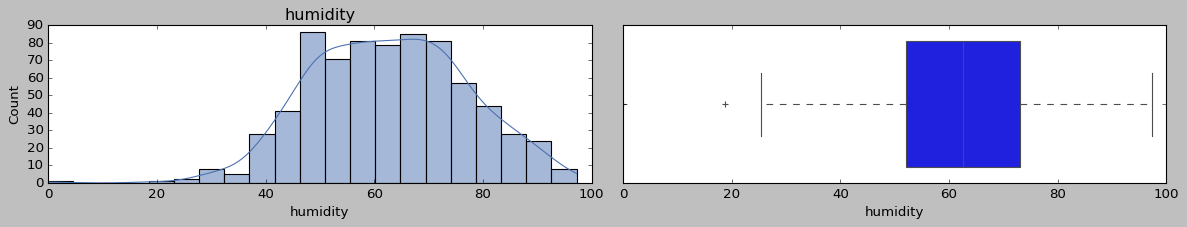

 HUMIDITY 
==================          humidity
count  730.000000
mean    62.765175
std     14.237589
min      0.000000
25%     52.000000
50%     62.625000
75%     72.989575
max     97.250000 




<Figure size 640x480 with 0 Axes>

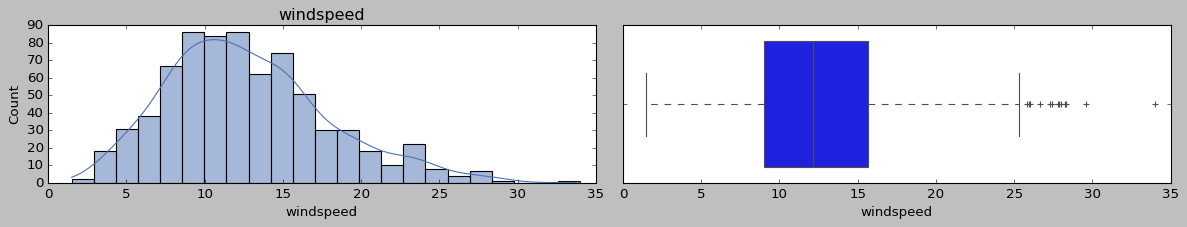

 WINDSPEED 
==================         windspeed
count  730.000000
mean    12.763620
std      5.195841
min      1.500244
25%      9.041650
50%     12.125325
75%     15.625589
max     34.000021 




<Figure size 640x480 with 0 Axes>

In [25]:
for i in feature_num_analysis:
    plot_uni_bi(1,2,"uni",bikes_df[i],15,3)

##### * Observations
- temp varies from 2 degree celcius to 35 degree celcius, warmer temperatures are good for outdoor activities.
- atemp varies from 3 - 42 degree celcius, mild warm temperatures are ideal for outdoor activities.
- hum varies from 0% -97%, extremely high and low humidity levels are not good for the outdoor activities i.e. renting/sharing a bike.
- wind speed varies from 1 - 34 mi/hr.
- Further observations are required to predict, ideal weather conditions for a good day for onlookers to book/rent a bike.

##### 4.1.2 Univariate Analysis
- Categorical/Dimensional Features

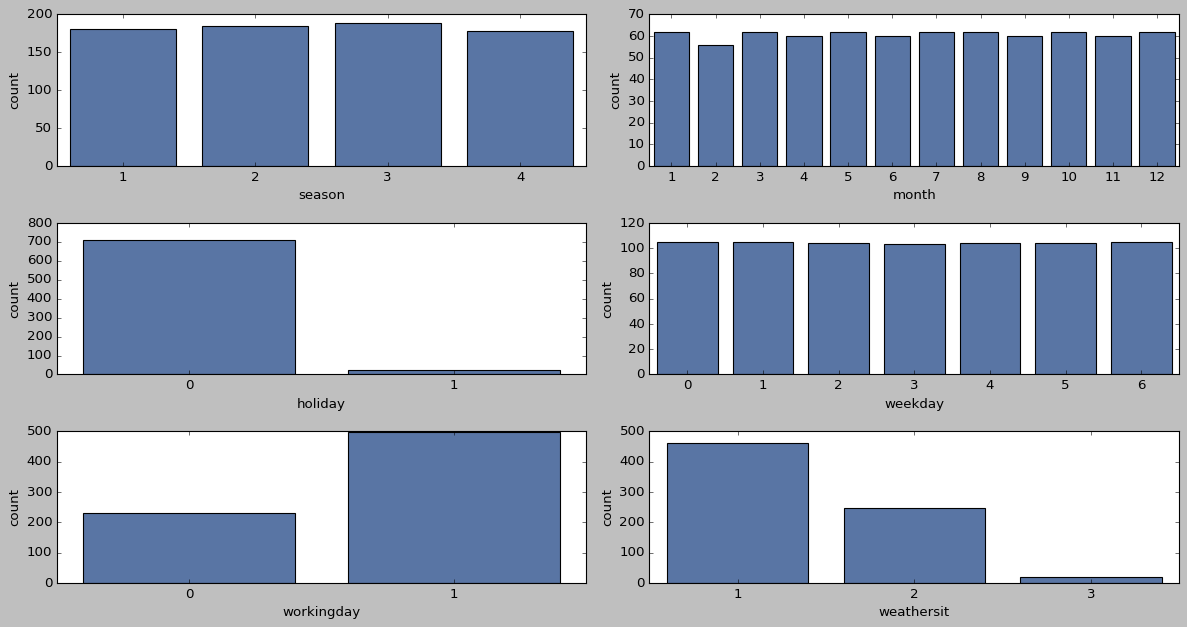

In [26]:
 plot_uni_bi(3,2,"countplot",bikes_df[feature_cat_analysis],15,8)

##### * Observation
- Graph shows the various frequencies of the categotical variables such as:
    - There were around 230 weekends/holidays, 200 weekends and around 30 holidays during the span of 2 years.
    - For about 450 days the weather stays clear with light clouds,for about 250 days the weather gets Misty/Cloudy, about 30 days the weather had light snow during 2017-2018, which isn't the right time for the outdoor biking.
We shall do further Analysis, to identify the significant features affecting the bike rental business.

##### 4.2 Bivariate Analysis

##### 4.2.1 Numeric Features

##### - Numeric Features analysis

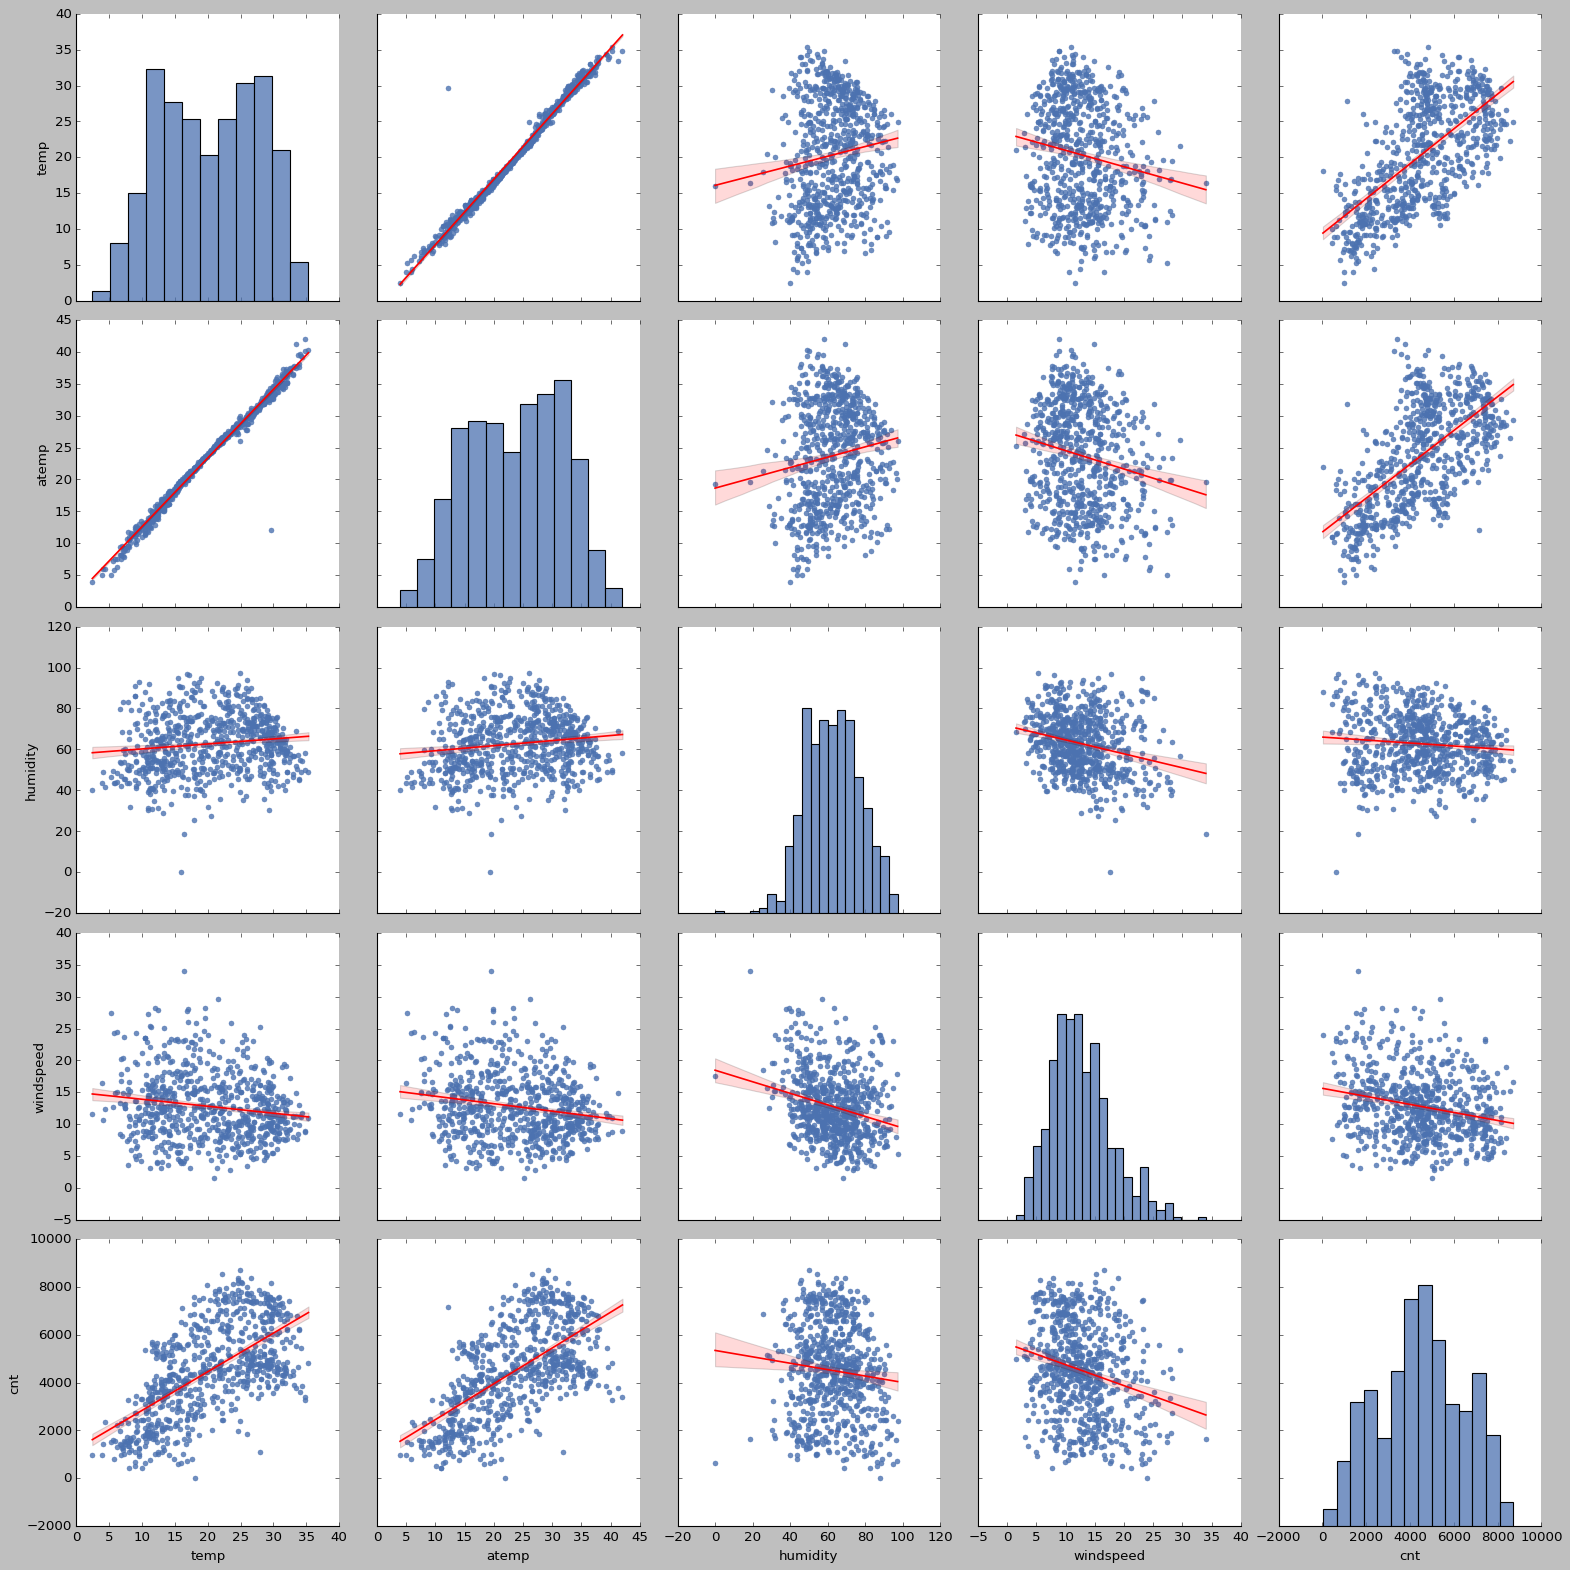

In [27]:
sns.pairplot(bikes_df[feature_num],kind='reg',height=4,plot_kws={'line_kws':{'color':'red'}})
plt.show()

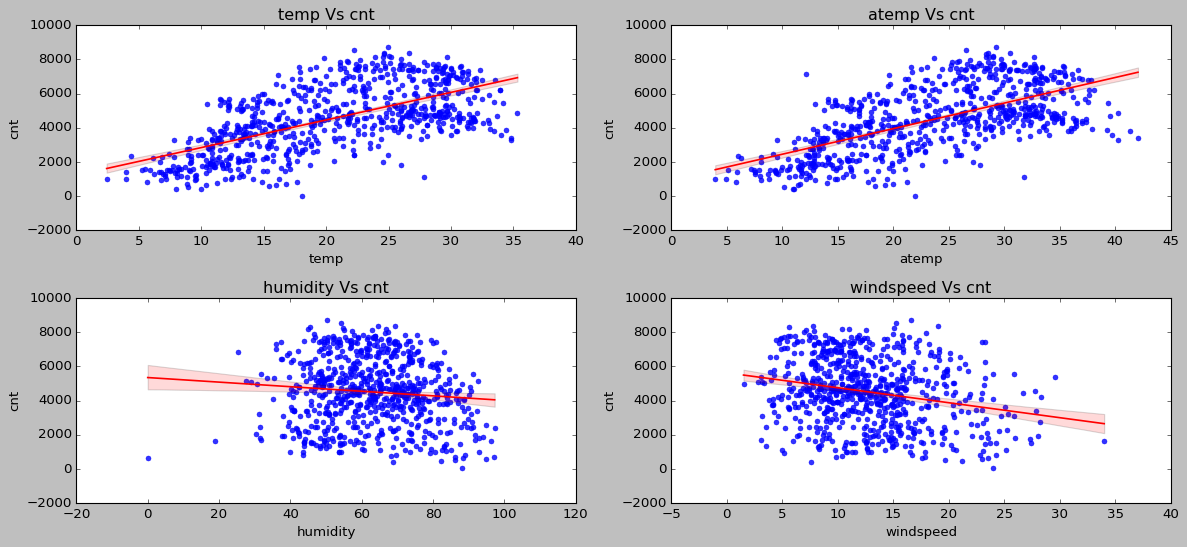

In [177]:
 plot_uni_bi(2,2,"regplot",bikes_df[feature_num],15,7)

##### - Observations -
- Bikes rental has a strong relationship with the temp and atemp with a positive slope, however temp and atemp are highly correlated too, so one of the both can be used.
- Bikes rental has a low negative relationship with the humidity and the windspeed, since the linear regression slope is negative so, higher the humidity or windspeed less likey the bikes rentals, however the correlation is not very strong.
- The graph above also demostrates that the linear relationship exists among the numeric independent and dependent variable(s), hence the multi linear regression can be applied.

##### 4.2.2 Categorical Features

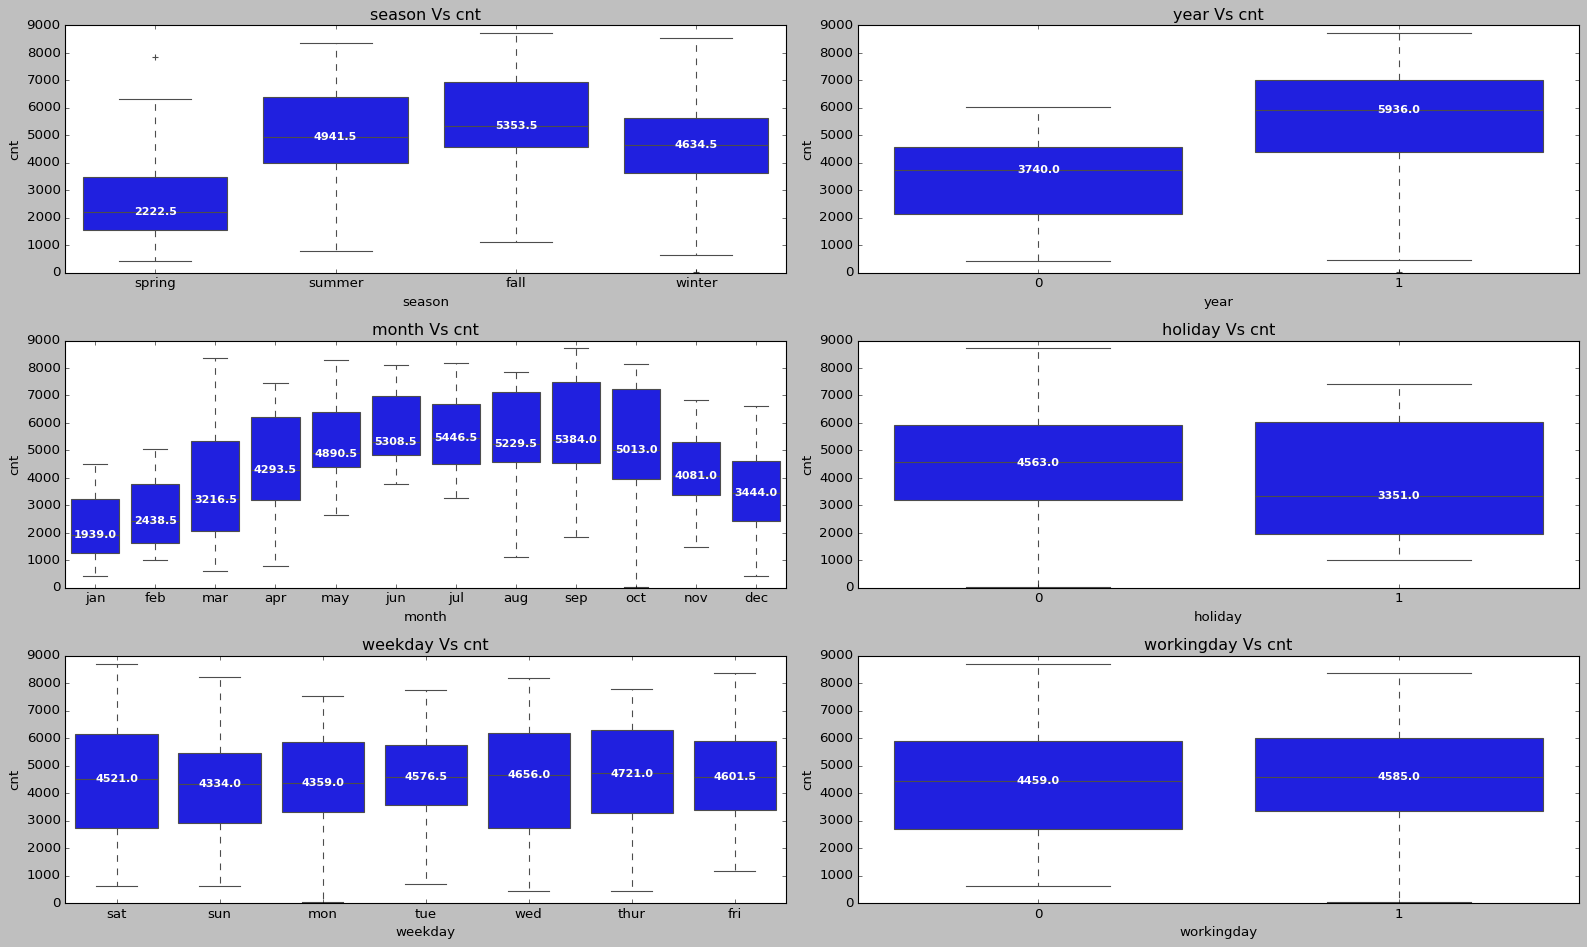

In [29]:
plot_uni_bi(3,2,"boxplot_bi",bikes_df[feature_cat],20,12)

##### - Observations
- Fall season has the highest bike rentals followed by,summer, winter annd spring, since organisation should think about expanding during fall, summer and winter, since spring has less booking, this time can be utilized for repairing,services and upgrading the bikes and related infrastructure. Since spring seson has a low footfall, organization must think of some offers to attract more buyers during this season.
- June, august, september, october has more demand as compared around other months of the year, wheras january, feb, december being the low demand months
- Thursdays and weekends has more demand.
- 2019 saw a sudden increase in the demand of bike rentals as compared to 2018.
- Working days and holidays doesnt have much impact on the bike rentals demands. 

##### 4.3 Multivariate

In [30]:
#check original dataframe
bikes_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### 4.3.1 Numeric feature correlation

In [31]:
bikes_df_num=bikes_df[feature_num]

In [32]:
bikes_df_num.corr()["cnt"]

temp         0.627044
atemp        0.630685
humidity    -0.098543
windspeed   -0.235132
cnt          1.000000
Name: cnt, dtype: float64

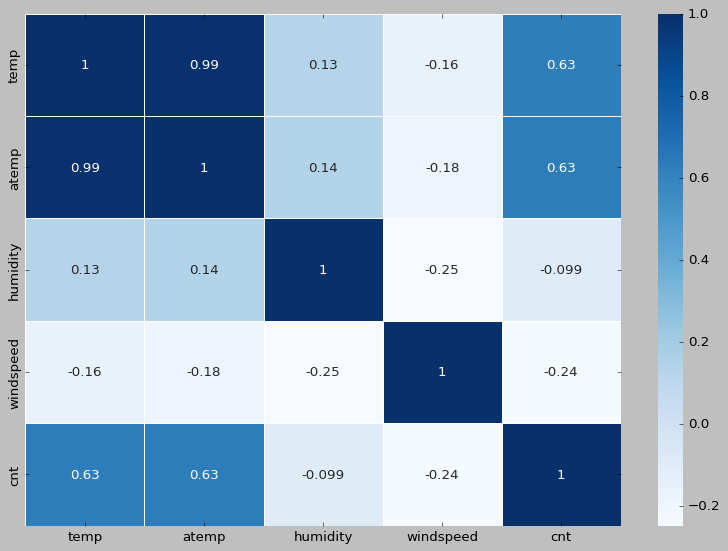

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(bikes_df_num.corr(),annot=True,cmap="Blues",linewidth=.5)
plt.show()

##### - Observations
- bike rentals are +vely correlated to temp and atemp, either of one can be used as temp and atemp are highly correlated to each other and would bring multicollinearity to the solution.
- humidity and windspeed are -vely correlated

##### 4.3.2 Categorical feature correlation

In [34]:
bikes_df_cat=bikes_df[feature_cat]

In [35]:
bikes_df_cat.corr()["cnt"]

season        0.404584
year          0.569728
month         0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
weathersit   -0.295929
cnt           1.000000
Name: cnt, dtype: float64

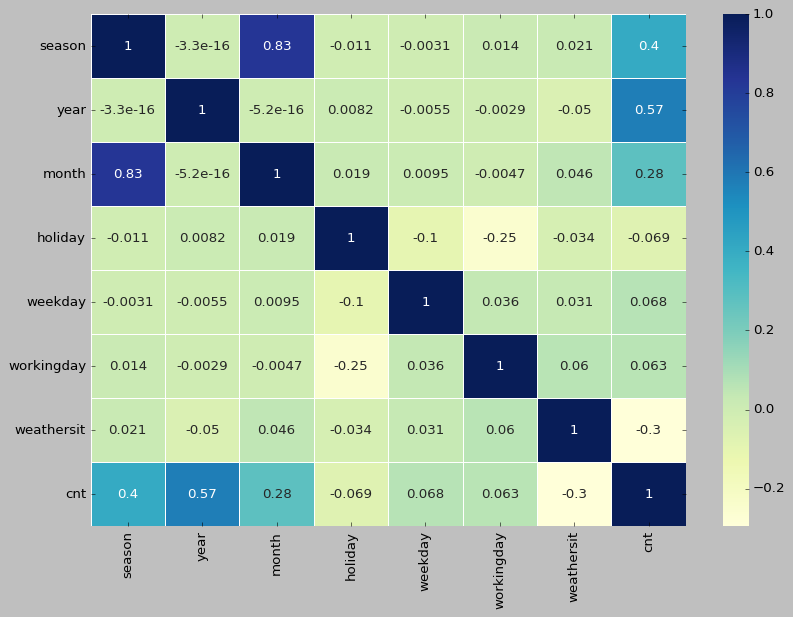

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(bikes_df_cat.corr(),annot=True,cmap="YlGnBu",linewidth=.5)
plt.show()

<a id='prep'></a>
#### 5. Preprocessing 
##### 5.1 Get Dummies
##### - we shall be using get dummies for the categorical features having more than two categories

In [37]:
map_cat(bikes_df).head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
dummies=feature_cat.copy()
dummies

['season',
 'year',
 'month',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'cnt']

##### - Removing cnt countinuous variable

In [39]:
dummies.remove("cnt")
dummies

['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

In [40]:
feature_cat

['season',
 'year',
 'month',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'cnt']

In [41]:
dummies_col=bikes_df[dummies].nunique()
dummies_col

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

##### - Removing columns with less than or equal to 2 categories, keeping the rest

In [42]:
dummy_col=dummies_col.loc[dummies_col>2].index.tolist()
dummy_col.remove("weathersit")
dummy_col

['season', 'month', 'weekday']

##### - Get Dummies for categorical variables having >2 categories
##### - drop_first is to be set true otherwise it would create redundant columns and increase the chances of introducing high multicollinearity 

In [43]:
df_months=pd.get_dummies(bikes_df.month,drop_first=True,dtype=int)
df_season=pd.get_dummies(bikes_df.season,drop_first=True,dtype=int)
df_weekday=pd.get_dummies(bikes_df.weekday,drop_first=True,dtype=int)
df_weathersit=pd.get_dummies(bikes_df.weathersit,drop_first=True,dtype=int)

##### - Merge the dummies to original data frame

In [174]:
dfs=[bikes_df,df_months,df_season,df_weekday,df_weathersit]
merged_dummies=pd.concat(dfs,axis=1)
merged_dummies.drop(["season","weekday","weathersit","month"],axis=1,inplace=True)


In [175]:
merged_dummies.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'spring', 'summer', 'winter', 'mon', 'sat', 'sun', 'thur', 'tue', 'wed', 'cloudy', 'lightsnow'], dtype='object')

In [46]:
merged_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    int64  
 9   dec         730 non-null    int64  
 10  feb         730 non-null    int64  
 11  jan         730 non-null    int64  
 12  jul         730 non-null    int64  
 13  jun         730 non-null    int64  
 14  mar         730 non-null    int64  
 15  may         730 non-null    int64  
 16  nov         730 non-null    int64  
 17  oct         730 non-null    int64  
 18  sep         730 non-null    int64  
 19  spring      730 non-null    i

##### 5.2 Train-Test Split
##### - separate the independent and the target variables as X and y

In [47]:
X=merged_dummies.drop(["cnt"],axis=1)
y=merged_dummies["cnt"]

In [48]:
X.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'spring', 'summer', 'winter', 'mon', 'sat', 'sun', 'thur', 'tue', 'wed', 'cloudy', 'lightsnow'], dtype='object')

##### - Creating (70:30) train:test split

In [49]:
#np.random.seed(0)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [50]:
print(X_train.shape)
print(X_test.shape)

(510, 29)
(220, 29)


##### - 70% of training data

##### 5.3 Scaling Algorithm usage Hypothesis

##### - Need to check if the data i.e. my target variable normally distributed, to choose the Scaler to fit for the scaling.
- H0= Normal Data
- H1!= Normally Distributed
- we shall check skewness and kurtosis and do shapiro test to see if the target varaible is normally distributed or not.

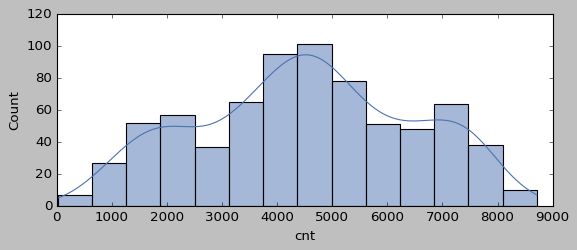

skew --> -0.049478668715917384
Kurtosis --> 2.189236717292547
  Shapiro Test  
Test Stats 0.9802505054677513
p-value 2.315834015246877e-08
Data is Not Normally Distributed, Rejected H0


In [51]:
from scipy.stats import skew, kurtosis, shapiro
plt.figure(figsize=(8,3))
sns.histplot(y,kde=True)
plt.show()
skewness=skew(y)
kurt=kurtosis(y)+3
print("===================================================")
print("skew -->",skewness)
print("Kurtosis -->",kurt)
stat, p_value=shapiro(y)
print("======================")
print("  Shapiro Test  ")
print("======================")
print(f"Test Stats {stat}")
print(f"p-value {p_value}")
if (p_value>0.05):
    print("Normally distributed, Failed to reject H0")
else:
    print("Data is Not Normally Distributed, Rejected H0")
print("===================================================")

##### - Since traget var is not normally distributed, H0 was rejected, we'd use min max scaler to do the scaling of data in order to normalize the data within a specific range.
##### - min max scaler transforms the data and scales/compresses it between 0-1 range.

##### 5.3 Scaling
##### - Using Min Max scaler

In [52]:
scaler=MinMaxScaler()

##### - We shall fit and transform train data whereas just transform test data as test data is unseen data and can not be fit onto the scaler

In [53]:
X_train[feature_num_analysis]=scaler.fit_transform(X_train[feature_num_analysis])
X_test[feature_num_analysis]=scaler.transform(X_test[feature_num_analysis])

In [54]:
X_train.shape

(510, 29)

In [55]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df=pd.DataFrame(X_test,columns=X.columns)

In [56]:
#check the training data frame
X_train_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thur,tue,wed,cloudy,lightsnow
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


##### 5.4 Feature selection
- we shal be using sklearn feature selection RFE API for feature selection, due to it's simplicity and ease of use.
- for modelling we would use statsmodels.api, due to its vast and statistically rich summary and usages 

In [57]:
estimator=LinearRegression()
estimator.fit(X_train_df,y_train)
rfe=RFE(estimator,n_features_to_select=15)
rfe=rfe.fit(X_train_df,y_train)

In [58]:
rfe_cols=X_train_df.columns[rfe.support_]
rfe_cols

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed', 'dec', 'jul', 'nov', 'spring', 'winter', 'sat', 'sun', 'cloudy', 'lightsnow'], dtype='object')

In [59]:
list(zip(X_train_df.columns,rfe.support_,rfe.ranking_))

[('year', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.False_, np.int64(3)),
 ('atemp', np.True_, np.int64(1)),
 ('humidity', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('aug', np.False_, np.int64(13)),
 ('dec', np.True_, np.int64(1)),
 ('feb', np.False_, np.int64(9)),
 ('jan', np.False_, np.int64(11)),
 ('jul', np.True_, np.int64(1)),
 ('jun', np.False_, np.int64(14)),
 ('mar', np.False_, np.int64(4)),
 ('may', np.False_, np.int64(5)),
 ('nov', np.True_, np.int64(1)),
 ('oct', np.False_, np.int64(6)),
 ('sep', np.False_, np.int64(2)),
 ('spring', np.True_, np.int64(1)),
 ('summer', np.False_, np.int64(8)),
 ('winter', np.True_, np.int64(1)),
 ('mon', np.False_, np.int64(10)),
 ('sat', np.True_, np.int64(1)),
 ('sun', np.True_, np.int64(1)),
 ('thur', np.False_, np.int64(15)),
 ('tue', np.False_, np.int64(7)),
 ('wed', np.False_, np.int64(12)),
 ('cloudy', np.True_, np.int64(1)),
 ('lightsnow', np

In [60]:
X_train=X_train_df[rfe_cols]
X_test=X_test_df[rfe_cols]

In [61]:
X_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,dec,jul,nov,spring,winter,sat,sun,cloudy,lightsnow
645,1,1,0,0.404998,0.731215,0.419004,0,0,0,0,1,0,0,1,0
163,0,0,1,0.685963,0.509660,0.708724,0,0,0,0,0,0,0,0,0
360,0,0,1,0.326273,0.785745,0.415925,1,0,0,1,0,0,0,1,0
640,1,0,1,0.682653,0.817947,0.110593,0,0,0,0,1,0,0,1,0
625,1,0,1,0.637937,0.899098,0.839562,0,0,0,0,0,0,0,1,0


In [62]:
print(X_train.shape)
print(X_test.shape)

(510, 15)
(220, 15)


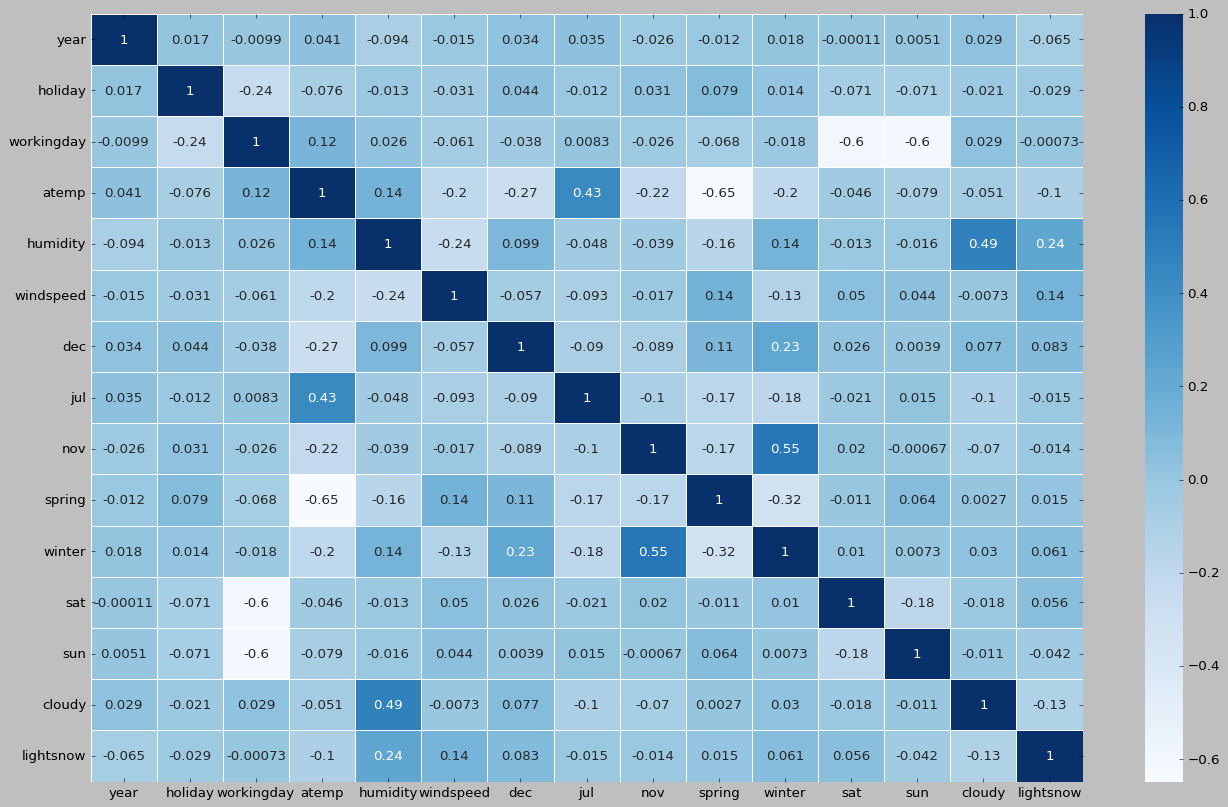

In [63]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train.corr(),annot=True,cmap="Blues",linewidth=.5)
plt.show()

<a id='model'>model</a>
#### 6. Modelling
##### using statsmodel.api , since it has vast and statiscally rich feature summary capabilities

##### Modelling rule
##### - Insignificant feature to be removed if
$ p>0.05 & vif> 4 $

##### Define functions for model and vif

In [64]:
#X_test_sm=sm.add_constant(X_test)
#create model function
def create_model(col):
    X_train_sm=sm.add_constant(X_train[col])
    model=sm.OLS(np.array(y_train),X_train_sm).fit()
    print(model.summary())
    return model

In [65]:
#define vif function
def vif(col):
    df_vif=X_train[col]
    vif_data=pd.DataFrame()
    vif_data["feature"]=df_vif.columns
    vif_data["VIF"]=[variance_inflation_factor(df_vif.values,i) for i in range(len(df_vif.columns))]
    vif_data["VIF"]=round(vif_data["VIF"],2)
    print(vif_data.sort_values(by="VIF",ascending=False))

##### - we will keep on evaluating the models based on p values, VIF and $ R^2 $, removing the features with high p>0.05 and vif>4 values

##### Model - 1

In [66]:
#selected features are:
rfe_cols

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed', 'dec', 'jul', 'nov', 'spring', 'winter', 'sat', 'sun', 'cloudy', 'lightsnow'], dtype='object')

In [67]:
col_1=rfe_cols.copy().tolist()
X_test_sm=sm.add_constant(X_test[col_1])
model_1=create_model(col_1)
vif(col_1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.99e-185
Time:                        20:17:08   Log-Likelihood:                -4119.6
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     495   BIC:                             8333.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2397.3791    246.525      9.725      0.0

##### -* Observations
- adjusted $ R^2 = 83.0% $
- Insignificant fields as $ p>0.05 $ <br>
  "workingday" Variance Inflation Factor VIF=19.77


##### Model -2 

In [68]:
col_1.remove("workingday")#holiday
col_2=col_1
X_test_sm.drop(["workingday"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[col_2])
model_2=create_model(col_2)
vif(col_2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.99e-185
Time:                        20:17:08   Log-Likelihood:                -4119.6
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     495   BIC:                             8333.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3228.9793    305.597     10.566      0.0

##### Model -3

In [69]:
col_2.remove("sat")#sun
col_3=col_2
X_test_sm.drop(["sat"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[col_3])
model_3=create_model(col_3)
vif(col_3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.55e-186
Time:                        20:17:08   Log-Likelihood:                -4119.7
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3242.0073    304.082     10.662      0.0

##### Model - 4

In [70]:
col_3.remove("humidity")
col_4=col_3
X_test_sm.drop(["humidity"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[col_4])
model_4=create_model(col_4)
vif(col_4)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.23e-184
Time:                        20:17:08   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     497   BIC:                             8335.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2527.0911    241.827     10.450      0.0

##### Model -5

In [71]:
col_4.remove("windspeed")
col_5=col_4
X_test_sm.drop(["windspeed"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[col_5])
model_5=create_model(col_5)
vif(col_5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          5.05e-183
Time:                        20:17:08   Log-Likelihood:                -4133.6
No. Observations:                 510   AIC:                             8291.
Df Residuals:                     498   BIC:                             8342.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2079.3063    210.270      9.889      0.0

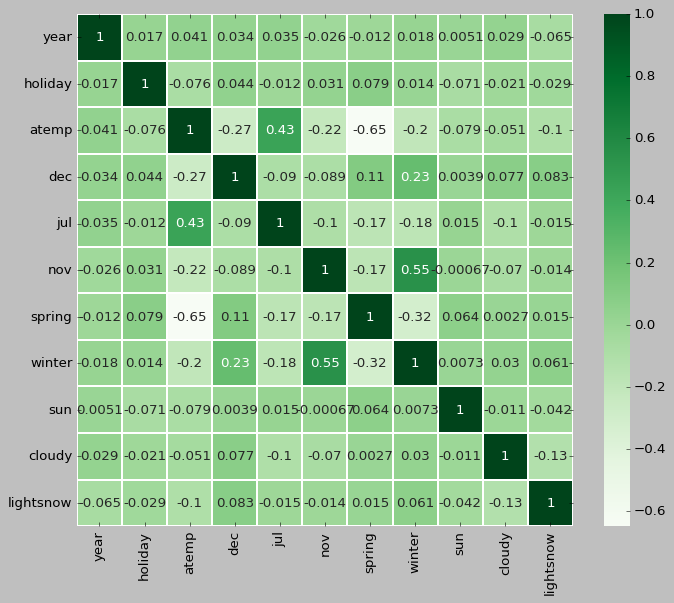

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train[col_5].corr(),annot=True,cmap='Greens',linewidths=.25)
plt.show()

##### Model - 6

In [73]:
col_5.remove("holiday")
col_6=col_5
X_test_sm.drop(["holiday"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[col_6])
model_6=create_model(col_6)
vif(col_6)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.31e-182
Time:                        20:17:08   Log-Likelihood:                -4138.0
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     499   BIC:                             8345.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2056.7273    211.740      9.713      0.0

##### Model - 7

In [76]:
col_6.remove("sun")
col_7=col_6
X_test_sm.drop(["sun"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[col_7])
model_7=create_model(col_7)
vif(col_7)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.41e-181
Time:                        20:19:03   Log-Likelihood:                -4143.7
No. Observations:                 510   AIC:                             8307.
Df Residuals:                     500   BIC:                             8350.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1967.2387    212.156      9.273      0.0

##### - 7th model looks good as all the p values are 0 and the vif looks good too, we will use model_7 for further evaluation and predictions.

#### Model Evaluation

##### $ R^2 $ value

In [95]:
X_train_sm=sm.add_constant(X_train[col_7])

In [96]:
y_train_pred=model_7.predict(X_train_sm)

In [141]:
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

In [143]:
print(r2_train)
print(mse_train)

0.8221916293282062
667842.6954802885


##### - $ R^2 = 0.822 $ for predicted outcome is same as that of final model prediction, Adjusted $ R^2 = 0.819 $  value is also the same.

##### Error Terms

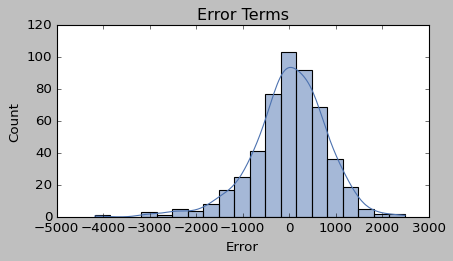

In [111]:
residual_error=y_train-y_train_pred
plt.figure(figsize=(6,3))
sns.histplot(residual_error,kde=True,bins=20)
plt.xlabel("Error")
plt.title("Error Terms")
plt.show()

##### - Error terms are normally distributed, with mean at zero. So the model is fine.

##### Actual vs Predicted

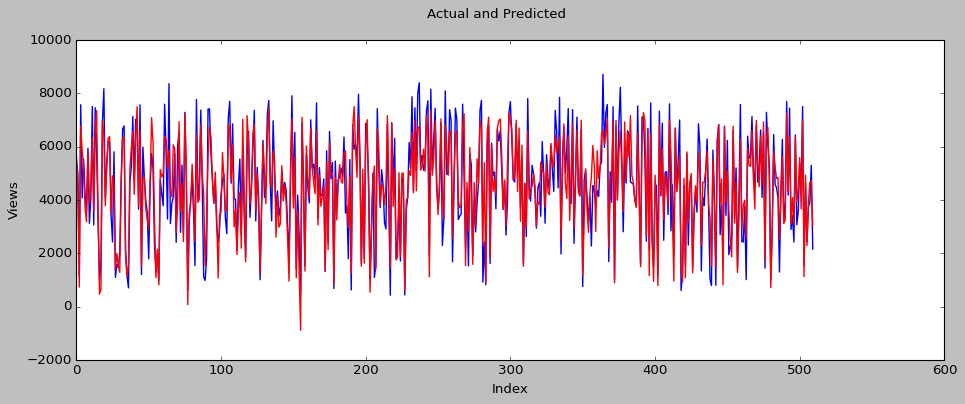

In [173]:
#Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_train, color="blue", linewidth=1.25, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=1.25, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=12)              # Plot heading 
plt.xlabel('Index', fontsize=12)                               # X-label
plt.ylabel('Views', fontsize=12)                               # Y-label
plt.show()


##### - *Actual and predicted values are almost overlapping, so accuracy looks good.

##### Linearity Check

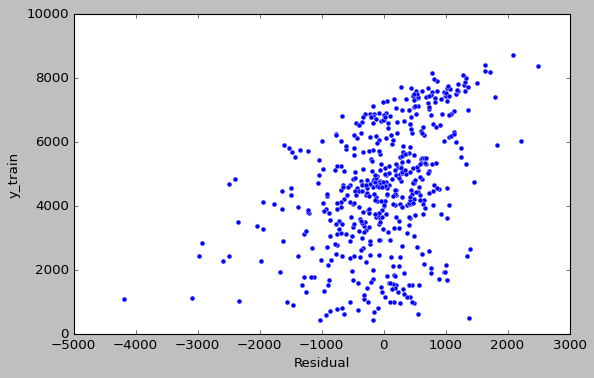

In [150]:
plt.figure(figsize=(8,5))
sns.scatterplot(y=y_train,x=residual_error)
plt.xlabel('Residual', fontsize=12)                               # X-label
plt.ylabel('y_train', fontsize=12)
plt.show()

##### - *Residual errors are randomly scattered and no further adjustments will enhance the predicted outcome, hence concluding the model.

##### Error Terms

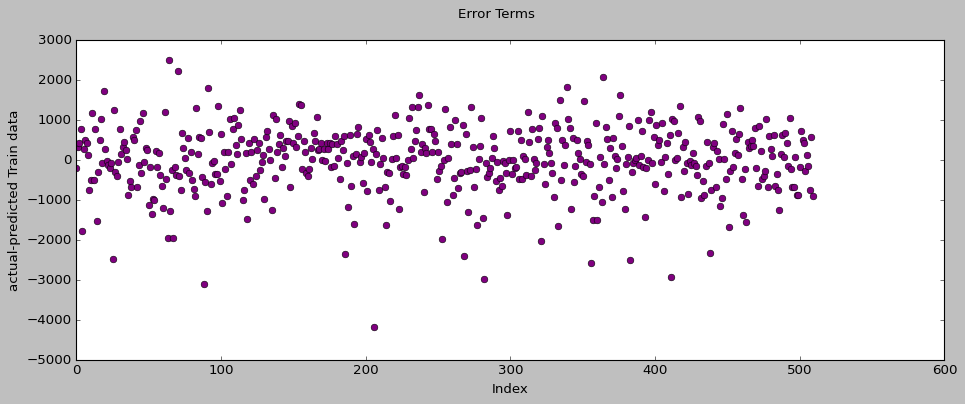

In [171]:
c = [i for i in range(0,len(y_train),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_train-y_train_pred, color="purple",marker='o', linewidth=1.25, linestyle=" ")
fig.suptitle('Error Terms', fontsize=12)              # Plot heading 
plt.xlabel('Index', fontsize=12)                      # X-label
plt.ylabel('actual-predicted Train data', fontsize=12)                # Y-label
plt.show()

#### Predictions

In [134]:
y_test_pred=model_7.predict(X_test_sm)

In [135]:
r2_test = r2_score(y_test, y_test_pred)

In [139]:
mse = mean_squared_error(y_test, y_tes_pred)

In [144]:
print(f" Train Set R^2 value: {r2_train}")
print(f" Test Set R^2 value: {r2_test}")
print(f" Train Set mean squared error value: {mse_train}")
print(f" Test Set mean squared error value: {mse}")

 Train Set R^2 value: 0.8221916293282062
 Test Set R^2 value: 0.8028266952970439
 Train Set mean squared error value: 667842.6954802885
 Test Set mean squared error value: 729266.3431104852


##### Training and Test Set $ R^2 $ and Adjusted $ R^2 $ are almost same

##### Homoscedasticity 

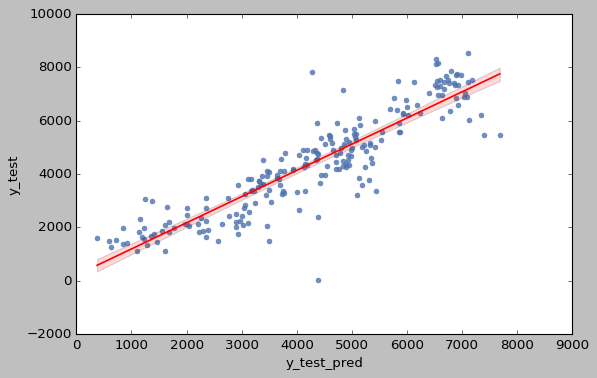

In [159]:
#checking the error spread
plt.figure(figsize=(8,5))
sns.regplot(y=y_test,x=y_test_pred,line_kws={"color": "red"})
plt.xlabel('y_test_pred', fontsize=12)                               # X-label
plt.ylabel('y_test', fontsize=12)
plt.show()

##### - variance looks almost constant acroos the plot

##### Test Actual Vs Predicted

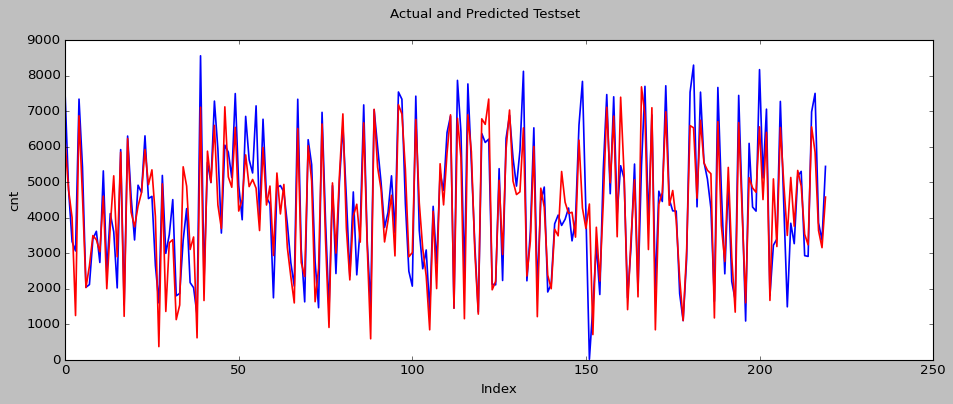

In [155]:
#Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted Testset', fontsize=12)              # Plot heading 
plt.xlabel('Index', fontsize=12)                               # X-label
plt.ylabel('cnt', fontsize=12)                               # Y-label
plt.show()

##### - Actual Vs Predicted overlaps almost, so the model is fine.

##### Error Terms Test

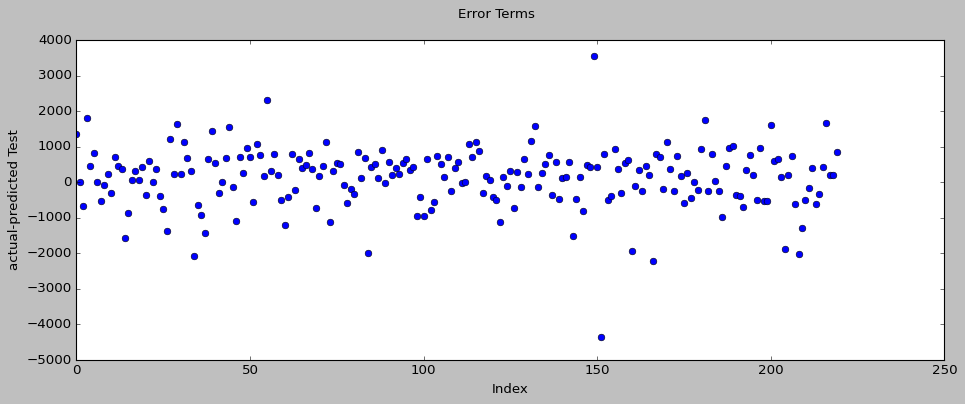

In [168]:
c = [i for i in range(0,len(y_test),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test-y_test_pred, color="blue",marker='o', linewidth=1.25, linestyle=" ")
fig.suptitle('Error Terms', fontsize=12)              # Plot heading 
plt.xlabel('Index', fontsize=12)                      # X-label
plt.ylabel('actual-predicted Test', fontsize=12)                # Y-label
plt.show()
